In [1]:
## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Merging all the csv file

In [2]:
directory_path = r'C:\Users\ACER\Downloads\crytocurrency 2023'

dfs = []
for file in os.listdir(directory_path):
    if file.endswith('.csv'):
        file_path = os.path.join(directory_path, file)
        df = pd.read_csv(file_path, infer_datetime_format=True)
        dfs.append(df)

merged_df = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
merged_df = merged_df.set_index('date')
#  merged_df = merged_df.drop(columns=[0]).reset_index(drop=True)
# merged_df = merged_df.drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [4]:
merged_df.head()

,price,total_volume,market_cap,coin_name
date,,,,
2019-06-21,1.604939,6.653181e+05,0.000000e+00,algorand
2019-06-22,3.172364,1.790331e+08,1.010855e+08,algorand
2019-06-23,2.159165,2.588226e+08,7.665618e+07,algorand
2019-06-24,1.899598,2.100211e+08,6.647512e+07,algorand
2019-06-25,1.409310,1.574706e+08,5.522254e+07,algorand


In [5]:
merged_df.columns

Index(['price', 'total_volume', 'market_cap', 'coin_name'], dtype='object')

In [6]:
merged_df.to_csv('final.csv')

In [7]:
df = pd.read_csv('final.csv')
df.head()

,date,price,total_volume,market_cap,coin_name
0,2019-06-21,1.604939,6.653181e+05,0.000000e+00,algorand
1,2019-06-22,3.172364,1.790331e+08,1.010855e+08,algorand
2,2019-06-23,2.159165,2.588226e+08,7.665618e+07,algorand
3,2019-06-24,1.899598,2.100211e+08,6.647512e+07,algorand
4,2019-06-25,1.409310,1.574706e+08,5.522254e+07,algorand


In [8]:
df['date'].unique()

array(['2019-06-21', '2019-06-22', '2019-06-23', ...,
       '2018-02-08 00:05:21.832', '2018-01-30 00:05:08.241',
       '2018-02-08 00:05:07.122'], dtype=object)

In [9]:
# Convert the Datetime objects back to strings in the 'YYYY-MM-DD' format.
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')


In [10]:
df['date'].unique()

array(['2019-06-21', '2019-06-22', '2019-06-23', ..., '2017-07-31',
       '2017-08-01', '2015-01-28'], dtype=object)

In [11]:
df.head()

,date,price,total_volume,market_cap,coin_name
0,2019-06-21,1.604939,6.653181e+05,0.000000e+00,algorand
1,2019-06-22,3.172364,1.790331e+08,1.010855e+08,algorand
2,2019-06-23,2.159165,2.588226e+08,7.665618e+07,algorand
3,2019-06-24,1.899598,2.100211e+08,6.647512e+07,algorand
4,2019-06-25,1.409310,1.574706e+08,5.522254e+07,algorand


## Finding the top 5 cryptocurrencies by market cap

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85728 entries, 0 to 85727
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          85728 non-null  object 
 1   price         85728 non-null  float64
 2   total_volume  85728 non-null  float64
 3   market_cap    85723 non-null  float64
 4   coin_name     85728 non-null  object 
dtypes: float64(3), object(2)
memory usage: 3.3+ MB


In [13]:
df2 = df.copy()

In [14]:
# create new year column and extra the year from date column
df2['year'] = df2['date'].apply(lambda x:x.split('-')[0])
df2.head()

,date,price,total_volume,market_cap,coin_name,year
0,2019-06-21,1.604939,6.653181e+05,0.000000e+00,algorand,2019
1,2019-06-22,3.172364,1.790331e+08,1.010855e+08,algorand,2019
2,2019-06-23,2.159165,2.588226e+08,7.665618e+07,algorand,2019
3,2019-06-24,1.899598,2.100211e+08,6.647512e+07,algorand,2019
4,2019-06-25,1.409310,1.574706e+08,5.522254e+07,algorand,2019


In [15]:
df2.to_csv('cleaned.csv')

In [16]:
df2['year'].unique()

array(['2019', '2020', '2021', '2022', '2023', '2017', '2018', '2015',
       '2016'], dtype=object)

In [17]:
top5_coins = df2.groupby(['coin_name'])['market_cap'].last().sort_values(ascending=False).head(10)
top5_coins

coin_name
bitcoin         5.876784e+11
ethereum        2.241395e+11
tether          8.340009e+10
binancecoin     3.680293e+10
usd-coin        2.752062e+10
ripple          2.458311e+10
staked-ether    1.417622e+10
cardano         1.017869e+10
dogecoin        9.210744e+09
solana          8.804631e+09
Name: market_cap, dtype: float64

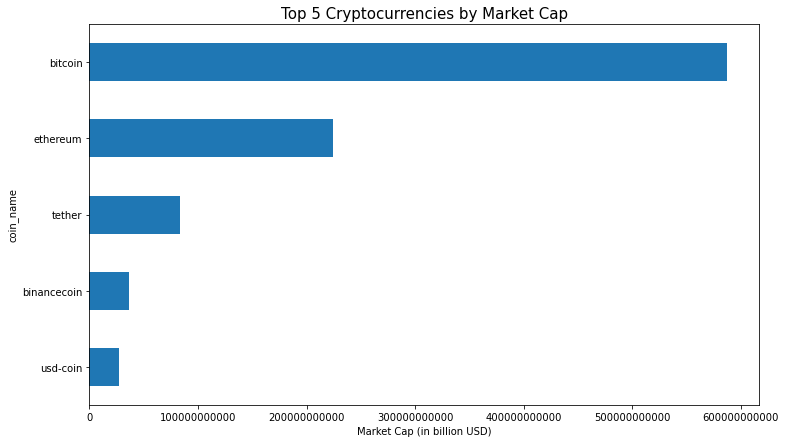

In [18]:
plt.figure(figsize=(12,7))

top5 = df2.groupby(['coin_name'])['market_cap'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
top5.set_xlabel('Market Cap (in billion USD)')
top5.ticklabel_format(style = 'plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()

C:\Users\ACER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\minicond

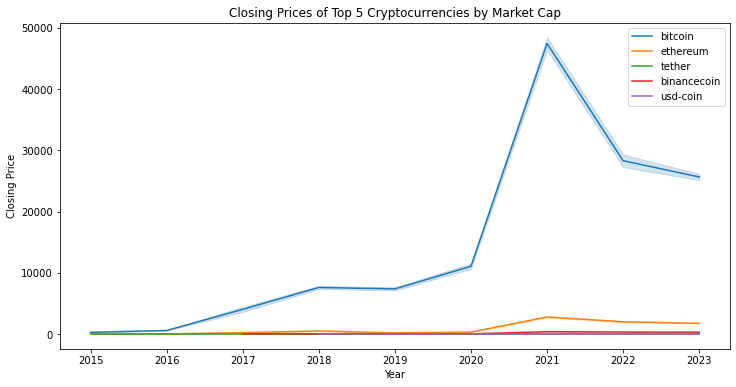

In [19]:
# Calculate the top 5 coins based on market capitalization
top5_coins = df2.groupby('coin_name')['market_cap'].last().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12, 6))

for coin in top5_coins:
    coin_df = df2[df2['coin_name'] == coin]
    sns.lineplot(coin_df['year'], coin_df['price'], label=coin)

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Top 5 Cryptocurrencies by Market Cap')
plt.legend()
plt.show()


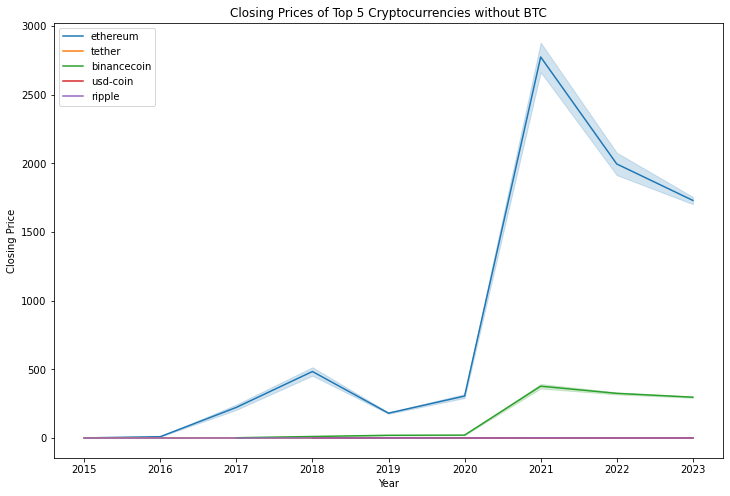

In [20]:
# Plot the top 5 coins based on market capitalization without bitcoin
top5_except_btc = df2[df2['coin_name'] != 'bitcoin'].groupby('coin_name')['market_cap'].last().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12, 8))

for coin in top5_except_btc:
    coin_df = df2[(df2['coin_name'] == coin) & (df2['coin_name'] != 'bitcoin')]
    sns.lineplot(data=coin_df, x='year', y='price', label=coin)

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Top 5 Cryptocurrencies without BTC')
plt.legend(loc='upper left')

plt.show()


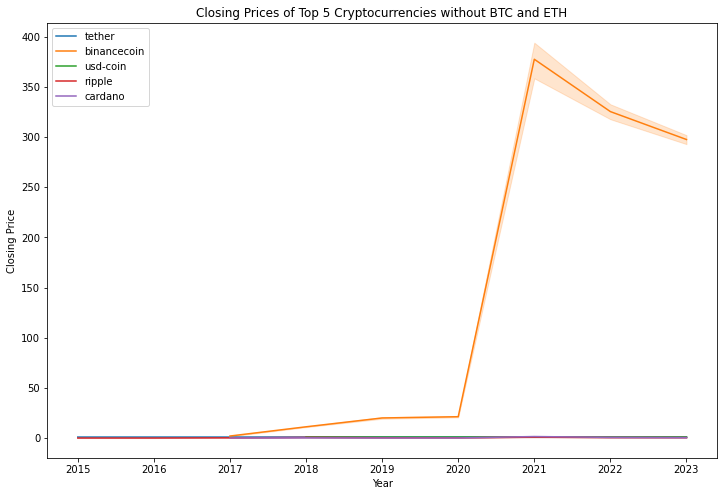

In [21]:
# Plot the top 5 coins based on market capitalization without bitcoin & ethereum
top5_except_btc_eth = df2[(df2['coin_name'] !='bitcoin') & 
                          (df2['coin_name'] !='ethereum') & 
                          (df2['coin_name'] !='staked-ether')].groupby(['coin_name'])['market_cap'].last().nlargest(5).index    
    
plt.figure(figsize=(12, 8))

for coin in top5_except_btc_eth:
    coin_df = df2[df2['coin_name'] == coin]
    sns.lineplot(data=coin_df, x='year', y='price', label=coin)

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Top 5 Cryptocurrencies without BTC and ETH')
plt.legend(loc='upper left')

plt.show()

